# 导入工具包

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

# 读取数据  
使用Pandas库read_csv()函数进行数据读取，分割符为‘\t’

In [11]:
train_data_file = "./steam_data/zhengqi_train.txt"
test_data_file =  "./steam_data/zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

# 查看数据基本信息
对数据有一个基本印象。

## df.info()

In [ ]:
train_data.info()
# test_data.info()


-----

说明：  
1. 此训练集数据共有2888个样本；
2. 数据中有V0-V37共计38个特征变量，变量类型都为数值类型，所有数据特征没有缺失值数据；

-----

## df.describe()

In [ ]:
train_data.describe()
# test_data.describe()

-----

说明：  
1. 上面数据显示了数据的统计信息，例如样本数，数据的均值mean，标准差std，最小值，最大值等；

-----

## df.head()

In [ ]:
train_data.head()
# test_data.head()

-----

说明：  
1. 显示训练集前5条数据的基本信息，可以看到数据都是浮点型数据，数据都是数值型连续型特征

-----

# 可视化数据分布
通过可视化的观察结果，可以做异常值分析、正态分布分析、分布一致性分析、线性分析、相关性分析等。

## 箱形图

单个属性的箱型图

In [ ]:
fig = plt.figure(figsize=(4, 6))  # 指定绘图对象宽度和高度
sns.boxplot(train_data['V0'],orient="v", width=0.5)

-----

说明：  
1. 可以看出‘V0’属性有偏离值，许多点位于下四分位点以下；

-----

所有属性的箱型图

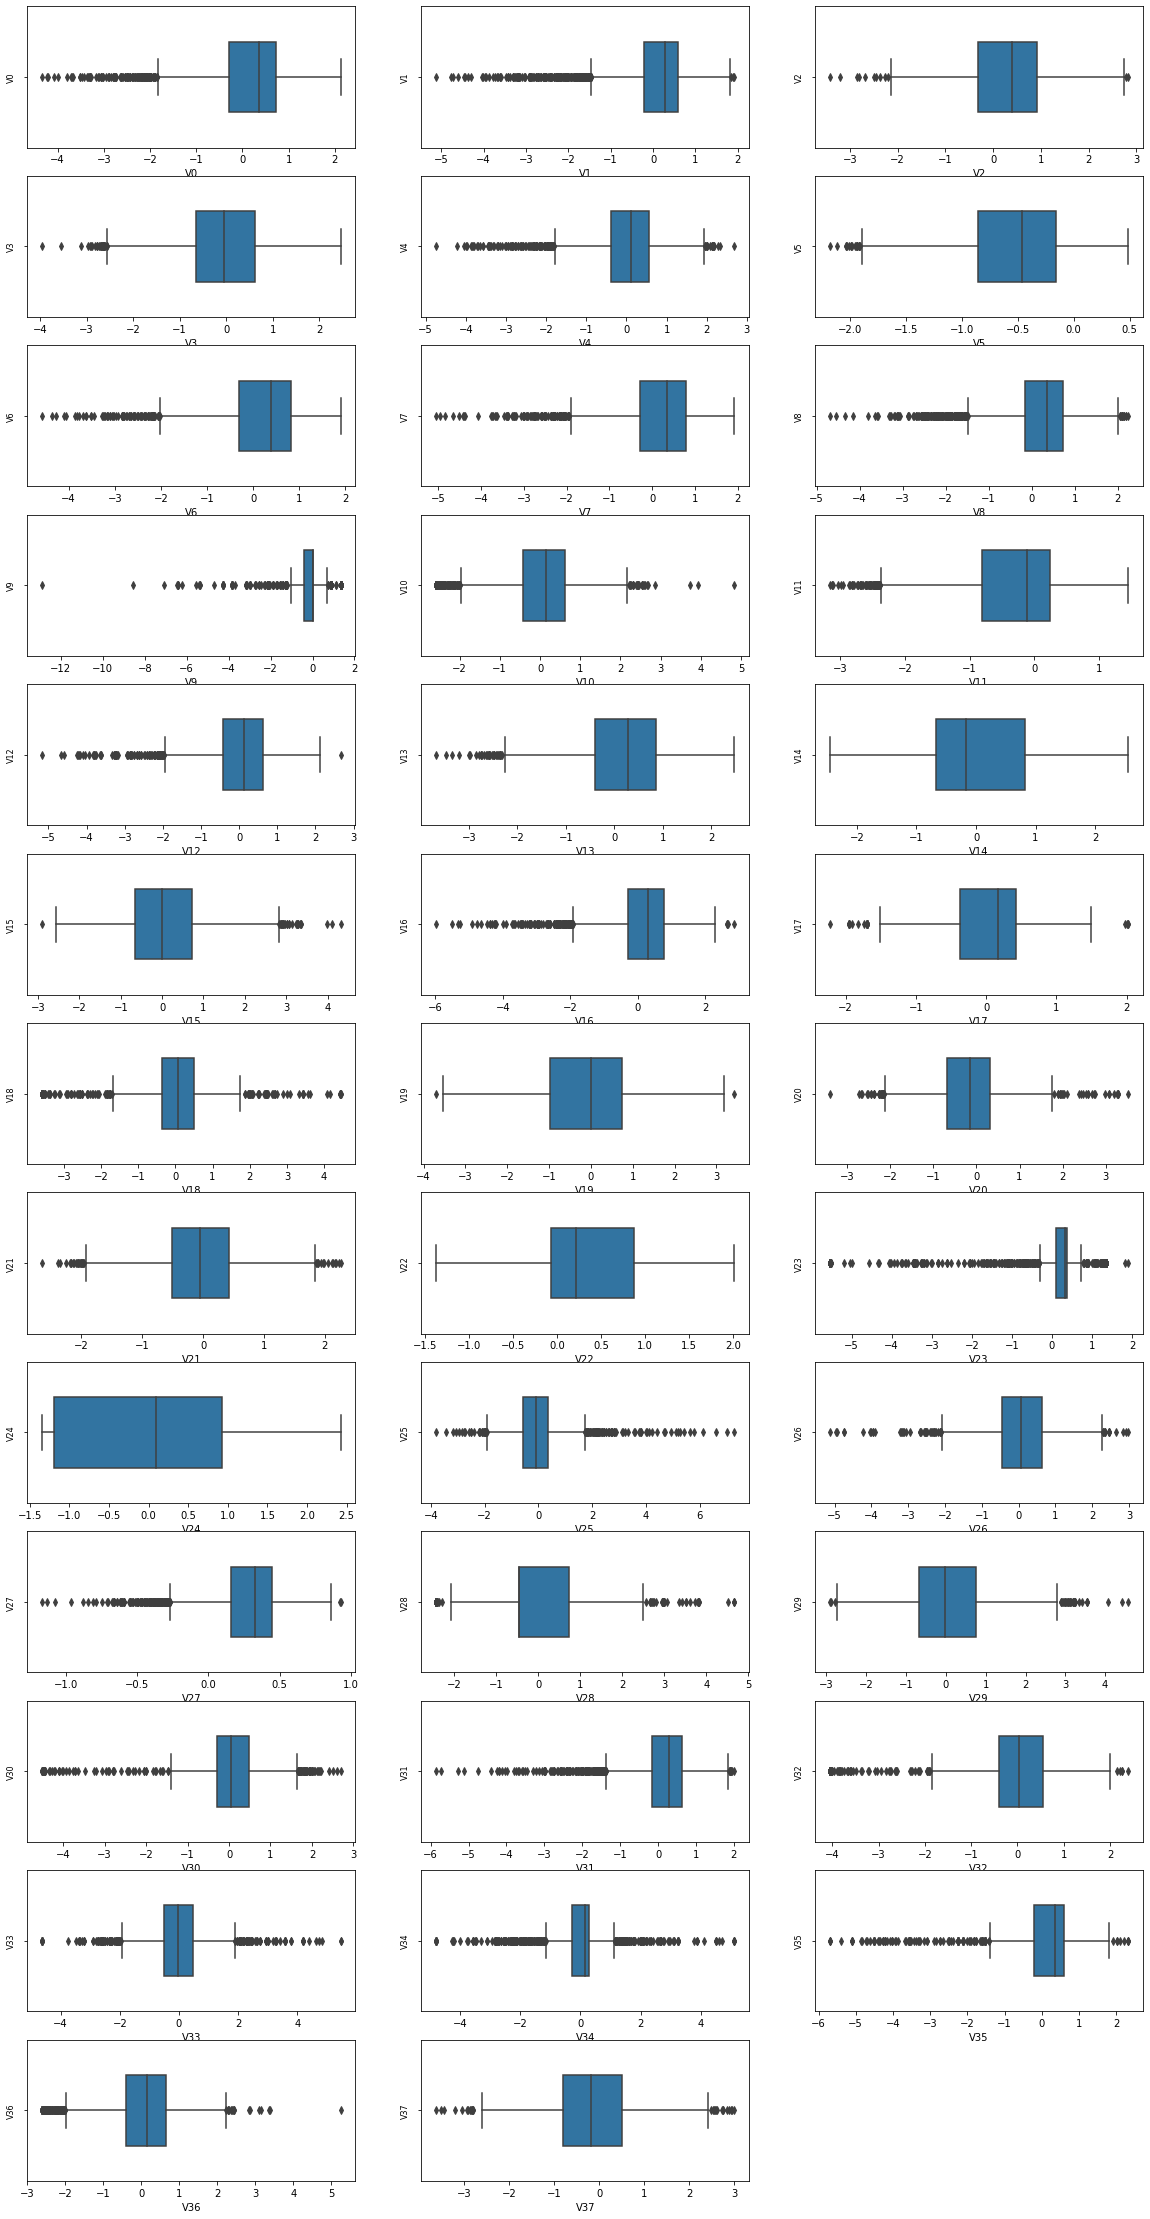

In [3]:
# 画箱式图
column = train_data.columns.tolist()[:39]  # 列表头
fig = plt.figure(figsize=(20, 40))  # 指定绘图对象宽度和高度
for i in range(38):
    plt.subplot(13, 3, i + 1)  # 13行3列子图
    sns.boxplot(train_data[column[i]], orient="v", width=0.5)  # 箱式图
    plt.ylabel(column[i], fontsize=8)
plt.show()

-----

说明：  
1. 从图中发现许多偏离较大的异常值，可以考虑移除；

-----

以更集中的方式查看所有变量的箱型图，便于更近一步找出异常点

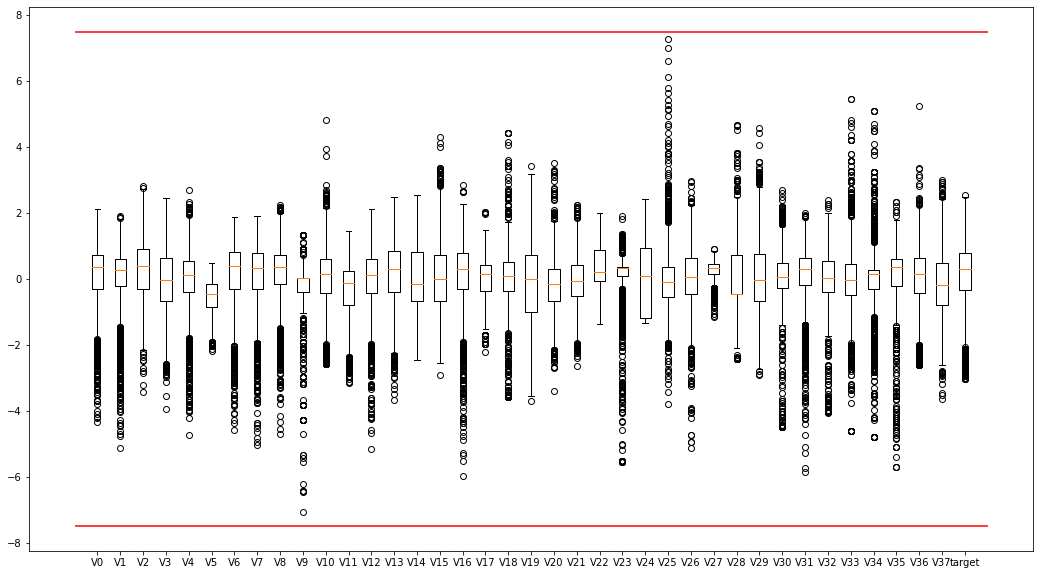

In [14]:
plt.figure(figsize=(18, 10))
plt.boxplot(x=train_data.values,labels=train_data.columns)
plt.hlines([-7.5, 7.5], 0, 40, colors='r')
plt.show()

-----

说明：  
1. 从图中发现有些特征存在明显的异常值，如V9，下面分别把训练集和测试集中的异常值删除；

-----

In [13]:
train_data = train_data[train_data['V9']>-7.5]
test_data = test_data[test_data['V9']>-7.5]
train_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.00000,...,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000
mean,0.123725,0.056856,0.290340,-0.068364,0.012254,-0.558971,0.183273,0.116274,0.178138,-0.16213,...,0.097019,0.058619,0.127617,0.023626,0.008271,0.006959,0.198513,0.030099,-0.131957,0.127451
std,0.927984,0.941269,0.911231,0.970357,0.888037,0.517871,0.918211,0.955418,0.895552,0.91089,...,1.060824,0.894311,0.873300,0.896509,1.007175,1.003411,0.985058,0.970258,1.015666,0.983144
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-7.07100,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.292000,-0.224250,-0.310000,-0.652750,-0.385000,-0.853000,-0.310000,-0.295000,-0.158750,-0.39000,...,-0.664000,-0.282000,-0.170750,-0.405000,-0.499000,-0.290000,-0.199750,-0.412750,-0.798750,-0.347500
50%,0.359500,0.273000,0.386000,-0.045000,0.109500,-0.466000,0.388500,0.345000,0.362000,0.04200,...,-0.023000,0.054500,0.299500,0.040000,-0.040000,0.160000,0.364000,0.137000,-0.186000,0.314000
75%,0.726000,0.599000,0.918750,0.623500,0.550000,-0.154000,0.831750,0.782750,0.726000,0.04200,...,0.745000,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.643750,0.493000,0.793750
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.33500,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


## 直方图和Q-Q图

单个属性直方图和Q-Q图

In [ ]:
plt.figure(figsize=(10,5))

ax=plt.subplot(1,2,1)
sns.distplot(train_data['V0'],fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(train_data['V0'], plot=plt)

-----

说明：  
1. 可以看到V0的分布不是正态分布；

-----

单个属性直方图和Q-Q图

In [ ]:
train_cols = 6
train_rows = len(train_data.columns)
plt.figure(figsize=(4*train_cols,4*train_rows))

i=0
for col in train_data.columns:
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    sns.distplot(train_data[col],fit=stats.norm)
    
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    res = stats.probplot(train_data[col], plot=plt)
plt.show()

-----

说明：  
1. 发现V1、V9、V24、V28等的数据分布不是正态的；

-----

## KDE分布图
KDE（Kernel Density Estimation）核密度估计，可以理解为对直方图的加窗平滑。通过绘制KDE分布图，可以对比训练集和测试集中的特征变量的分布情况，发现两个数据集的分布是否一致。分布不一致的特征对预测产生很大的干扰，应考虑移除。

单个变量的KDE对比

In [ ]:
ax = sns.kdeplot(train_data['V0'], color="Red", shade=True)
ax = sns.kdeplot(test_data['V0'], color="Blue", shade=True)
ax.set_xlabel('V0')
ax.set_ylabel("Frequency")
ax = ax.legend(["train","test"])

-----

说明：  
1. V0在两个数据集上的分布基本一致；

-----

所有变量的KDE对比

In [ ]:
dist_cols = 6
dist_rows = len(test_data.columns)
plt.figure(figsize=(4*dist_cols,4*dist_rows))

i=1
for col in test_data.columns:
    ax=plt.subplot(dist_rows,dist_cols,i)
    ax = sns.kdeplot(train_data[col], color="Red", shade=True)
    ax = sns.kdeplot(test_data[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
    
    i+=1
plt.show()

-----

说明：  
1. 特征'V5', 'V17', 'V28', 'V22', 'V11', 'V9'数据的数据分布很不一致；

-----

进一步的观察上面几个变量的分布一致性。

In [ ]:
drop_col = 6
drop_row = 1

plt.figure(figsize=(5*drop_col,5*drop_row))

i=1
for col in ["V5","V9","V11","V17","V22","V28"]:
    ax =plt.subplot(drop_row,drop_col,i)
    ax = sns.kdeplot(train_data[col], color="Red", shade=True)
    ax = sns.kdeplot(test_data[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
    
    i+=1
plt.show()

-----

说明：  
1. 由上图的数据分布可以看到特征'V5','V9','V11','V17','V22','V28' 训练集数据与测试集数据分布不一致，会导致模型泛化能力差，采用删除此类特征方法；

-----

移除'V5','V9','V11','V17','V22','V28'这些变量

In [15]:
drop_columns = ['V5','V9','V11','V17','V22','V28']
data_train1 = train_data.drop(drop_columns, axis=1)
data_test1 = test_data.drop(drop_columns, axis=1)

## 可视化线性回归关系
线性回归关系图主要用于分析变量之间的线性回归关系。

首先分析变量V0和target之间的线性回归关系。

In [ ]:
fcols = 2
frows = 1

plt.figure(figsize=(8,4))

ax=plt.subplot(1,2,1)
sns.regplot(x='V0', y='target', data=train_data, ax=ax, 
            scatter_kws={'marker':'.','s':3,'alpha':0.3},
            line_kws={'color':'k'});
plt.xlabel('V0')
plt.ylabel('target')

ax=plt.subplot(1,2,2)
sns.distplot(train_data['V0'].dropna())
plt.xlabel('V0')

plt.show()

查看所有特征变量与'target'变量的线性回归关系

In [ ]:
fcols = 6
frows = len(test_data.columns)
plt.figure(figsize=(5*fcols,4*frows))

i=0
for col in test_data.columns:
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.regplot(x=col, y='target', data=train_data, ax=ax, 
                scatter_kws={'marker':'.','s':3,'alpha':0.3},
                line_kws={'color':'k'});
    plt.xlabel(col)
    plt.ylabel('target')
    
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.distplot(train_data[col].dropna())
    plt.xlabel(col)

## 相关性热力图
与target变量相关系数大于0.5的特征变量被直观的筛选出来。相关性热力图可以简单、直观的判断哪些特征变量与target相关性大，那些没有相关性。对于相关性大的则考虑保留，相关性小的考虑移除。  
需要注意的是，这里的相关性仍然是线性相关性，对于target变量如果存在更复杂的非线性关系，则考虑使用树模型的特征做重要性选择。  
还有，相关性分析是在分布一致性的基础上做的。

In [ ]:
train_corr = data_train1.corr(method='pearson')
# train_corr

# 画出相关性热力图
ax = plt.subplots(figsize=(20, 16))#调整画布大小
ax = sns.heatmap(train_corr, vmax=.8, square=True, annot=True)#画热力图   annot=True 显示系数

-----

DataFrame.corr(method='pearson', min_periods=1)

参数说明：

method：可选值为{‘pearson’, ‘kendall’, ‘spearman’}

- pearson：Pearson相关系数来衡量两个数据集合是否在一条线上面，即针对线性数据的相关系数计算，针对非线性                                           数据便会有误差。

- kendall：用于反映分类变量相关性的指标，即针对无序序列的相关系数，非正太分布的数据

- spearman：非线性的，非正太分析的数据的相关系数

min_periods：样本最少的数据量

-----

因为相关矩阵是对称的，所以可以只显示一半。

In [ ]:
# 找出相关程度
plt.figure(figsize=(20, 16))  # 指定绘图对象宽度和高度
colnm = data_train1.columns.tolist()  # 列表头
mcorr = data_train1[colnm].corr(method="spearman")  # 相关系数矩阵，即给出了任意两个变量之间的相关系数
mask = np.zeros_like(mcorr, dtype=np.bool)  # 构造与mcorr同维数矩阵 为bool型
mask[np.triu_indices_from(mask)] = True  # 角分线右侧为True
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # 返回matplotlib colormap对象
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')  # 热力图（看两两相似度）
plt.show()

display(mcorr)

考虑特征变量和标签变量的相关性，方便以后做特征工程和模型分析。首先寻找K个与targe变量最相关的特征变量（K=10）。

In [ ]:
#寻找K个最相关的特征信息
k = 10 # number of variables for heatmap
cols = train_corr.nlargest(k, 'target')['target'].index

cm = np.corrcoef(train_data[cols].values.T)
hm = plt.subplots(figsize=(10, 10))#调整画布大小
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True)
#g = sns.heatmap(train_data[cols].corr(),annot=True,square=True,cmap="RdYlGn")
hm = sns.heatmap(train_data[cols].corr(),annot=True,square=True)

plt.show()


查找出特征变量和target变量相关系数大于0.5的特征变量

In [ ]:
threshold = 0.5

corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat["target"])>threshold]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")



查看与target变量最不相关的变量

In [16]:
# Threshold for removing correlated variables
threshold = 0.1

# Absolute value correlation matrix
corr_matrix = data_train1.corr().abs()
drop_col=corr_matrix[corr_matrix["target"]<threshold].index
drop_col
#data_all.drop(drop_col, axis=1, inplace=True)

Index(['V14', 'V21', 'V25', 'V26', 'V32', 'V33', 'V34'], dtype='object')

由于'V14', 'V21', 'V25', 'V26', 'V32', 'V33', 'V34'特征的相关系数值小于0.1，故认为这些特征与最终的预测target值不相关，删除这些特征变量，训练集和测试集同时删除这些变量；  
为了和书中一致，这里仅删除相关性低的变量，没有删除分布不一致的变量。

In [17]:
# drop_columns.clear()
drop_columns = drop_col

#merge train_set and test_set
train_x =  train_data.drop(['target'], axis=1)

#data_all=pd.concat([train_data,test_data],axis=0,ignore_index=True)
data_all = pd.concat([train_x,test_data]) 


data_all.drop(drop_columns,axis=1,inplace=True)
#View data
data_all.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V27,V28,V29,V30,V31,V35,V36,V37
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.356,0.800,0.168,-0.450,0.136,0.109,-0.615,-5.101,-2.608,-3.508
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,0.357,0.801,0.338,0.671,-0.128,0.124,0.032,0.364,-0.335,-0.730
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,0.355,0.961,0.326,1.287,-0.009,0.361,0.277,0.364,0.765,-0.589
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.352,1.435,0.277,1.298,0.015,0.417,0.279,0.364,0.333,-0.112
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.352,0.881,0.332,1.289,0.183,1.078,0.328,0.364,-0.280,-0.028


## Box-Cox变换
。。。

在做Box-Cox之前需要对数据做归一化处理。

In [18]:
# normalise numeric columns
cols_numeric=list(data_all.columns)

def scale_minmax(col):
    return (col-col.min())/(col.max()-col.min())

data_all[cols_numeric] = data_all[cols_numeric].apply(scale_minmax,axis=0)
data_all[cols_numeric].describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V27,V28,V29,V30,V31,V35,V36,V37
count,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,...,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000
mean,0.694172,0.721357,0.602300,0.603139,0.523743,0.407246,0.748823,0.745740,0.715607,0.879536,...,0.744438,0.356712,0.881401,0.342653,0.388683,0.589459,0.792709,0.762873,0.332385,0.545795
std,0.144198,0.131443,0.140628,0.152462,0.106430,0.186636,0.132560,0.132577,0.118105,0.068244,...,0.134085,0.265512,0.128221,0.140731,0.133475,0.130786,0.102976,0.102037,0.127456,0.150356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.626676,0.679416,0.514414,0.503888,0.478182,0.298432,0.683324,0.696938,0.664934,0.852903,...,0.719362,0.040616,0.888575,0.278778,0.292445,0.550092,0.761816,0.727273,0.270584,0.445647
50%,0.729488,0.752497,0.617072,0.614270,0.535866,0.382419,0.774125,0.771974,0.742884,0.882377,...,0.788817,0.381736,0.916015,0.279904,0.375734,0.594428,0.815055,0.800020,0.347056,0.539317
75%,0.790195,0.799553,0.700464,0.710474,0.585036,0.460246,0.842259,0.836405,0.790835,0.941189,...,0.792706,0.574728,0.932555,0.413031,0.471837,0.650798,0.852229,0.800020,0.414861,0.643061
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


为了观察Box-Cox变换的效果，这里再次复制一份原始数据train_data、test_data，并针对train_data观察变换前后变量的正态分布性、与target相关性的变化。

In [19]:
#col_data_process = cols_numeric.append('target')
train_data_process = train_data[cols_numeric]
train_data_process = train_data_process[cols_numeric].apply(scale_minmax,axis=0)

test_data_process = test_data[cols_numeric]
test_data_process = test_data_process[cols_numeric].apply(scale_minmax,axis=0)



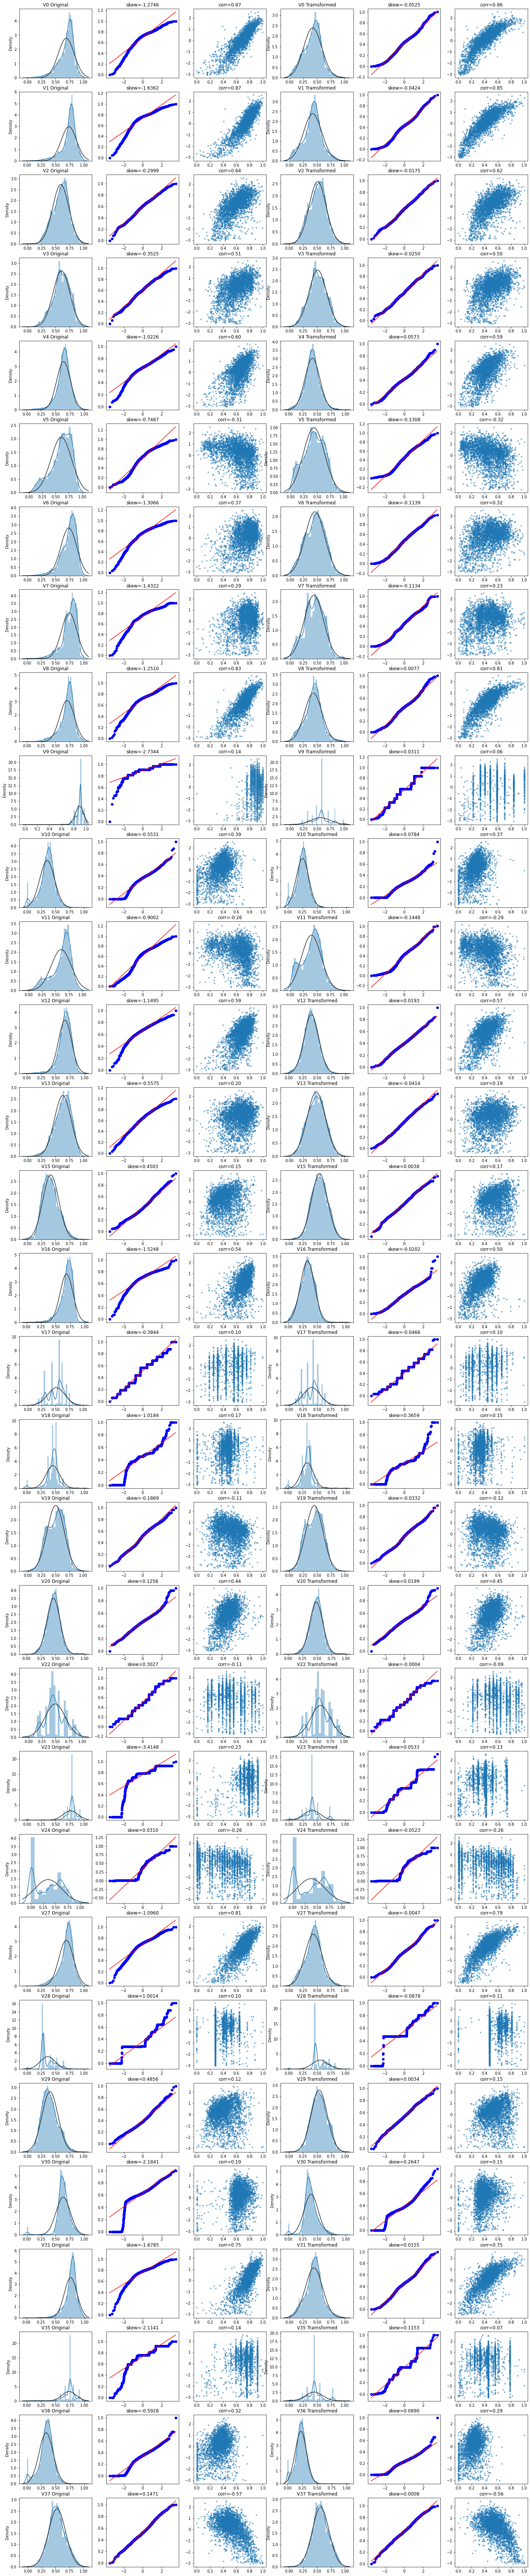

In [20]:
## Check effect of Box-Cox transforms on distributions of continuous variables

train_data_process = pd.concat([train_data_process, train_data['target']], axis=1)

fcols = 6
frows = len(cols_numeric)
plt.figure(figsize=(4*fcols,4*frows))
i=0

for var in cols_numeric:
    dat = train_data_process[[var, 'target']].dropna()
        
    i+=1
    plt.subplot(frows,fcols,i)
    sns.distplot(dat[var] , fit=stats.norm);
    plt.title(var+' Original')
    plt.xlabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(dat[var], plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(dat[var])))
    plt.xlabel('')
    plt.ylabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(dat[var], dat['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(dat[var], dat['target'])[0][1]))
 
    i+=1
    plt.subplot(frows,fcols,i)
    trans_var, lambda_var = stats.boxcox(dat[var].dropna()+1)
    trans_var = scale_minmax(trans_var)      
    sns.distplot(trans_var , fit=stats.norm);
    plt.title(var+' Tramsformed')
    plt.xlabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(trans_var, plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(trans_var)))
    plt.xlabel('')
    plt.ylabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(trans_var, dat['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_var,dat['target'])[0][1]))

In [22]:
??subplot

Object `subplot` not found.
